In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 15)
import seaborn as sns
import h5py

## Effective Pressure

In [2]:
effective_pressure_file = h5py.File('effective_pressure_smoothed_subset_RD0000.hdf5')
p_eff_x = np.array(effective_pressure_file['p_eff_x'][:])
p_eff_y = np.array(effective_pressure_file['p_eff_y'][:])
p_eff_z = np.array(effective_pressure_file['p_eff_z'][:])
density = np.array(effective_pressure_file['density'][:])
norm = np.sqrt(np.square(p_eff_x) + np.square(p_eff_y) + np.square(p_eff_z))

In [3]:
effective_pressure = pd.DataFrame(
    {'p_eff_x': p_eff_x,
     'p_eff_y': p_eff_y,
     'p_eff_z': p_eff_z,
     'norm': norm,
     'density': density,
     'lognorm': np.log10(norm),
     'logdensity': np.log10(density)
    }
)
effective_pressure.describe()

,density,logdensity,lognorm,norm,p_eff_x,p_eff_y,p_eff_z
count,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.233511e-30,-30.192937,-inf,6.604552e-17,2.235582e-17,4.648191e-18,4.619097e-17
std,2.116951e-29,0.576453,NaN,7.521709e-16,3.126677e-16,6.779176e-17,6.819919e-16
min,4.891574e-32,-31.310551,-inf,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.551765e-31,-30.593159,-21.139809,7.247568e-22,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.896790e-31,-30.310089,-19.643381,2.273113e-20,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.221262e-30,-29.913191,-18.483525,3.284544e-19,1.961631e-20,2.296465e-20,1.297632e-20
max,5.492066e-28,-27.260264,-13.740049,1.819498e-14,7.085276e-15,2.005507e-15,1.819495e-14


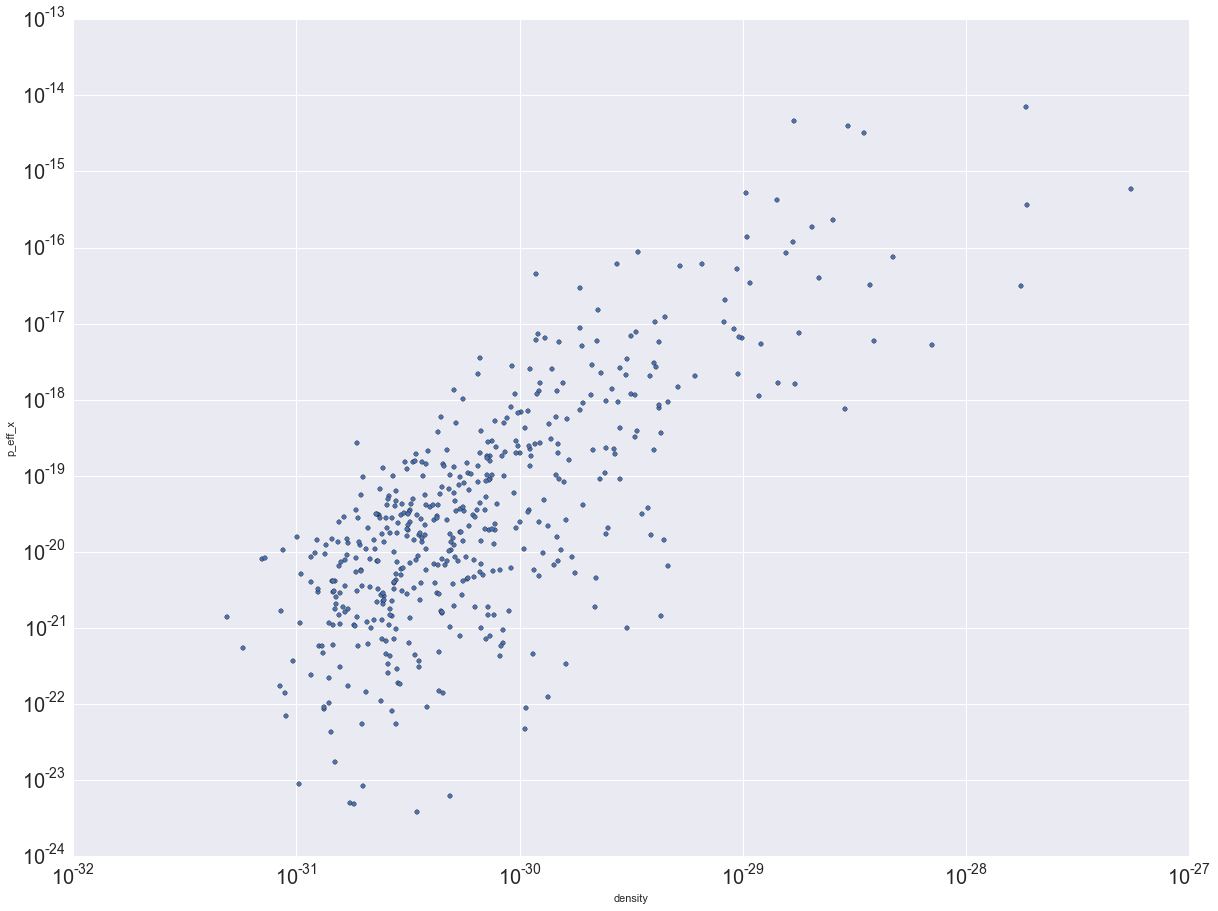

In [13]:
effective_pressure.plot.scatter(x='density', y='p_eff_x', loglog=True, ylim=[10e-25,10e-14], fontsize=20)

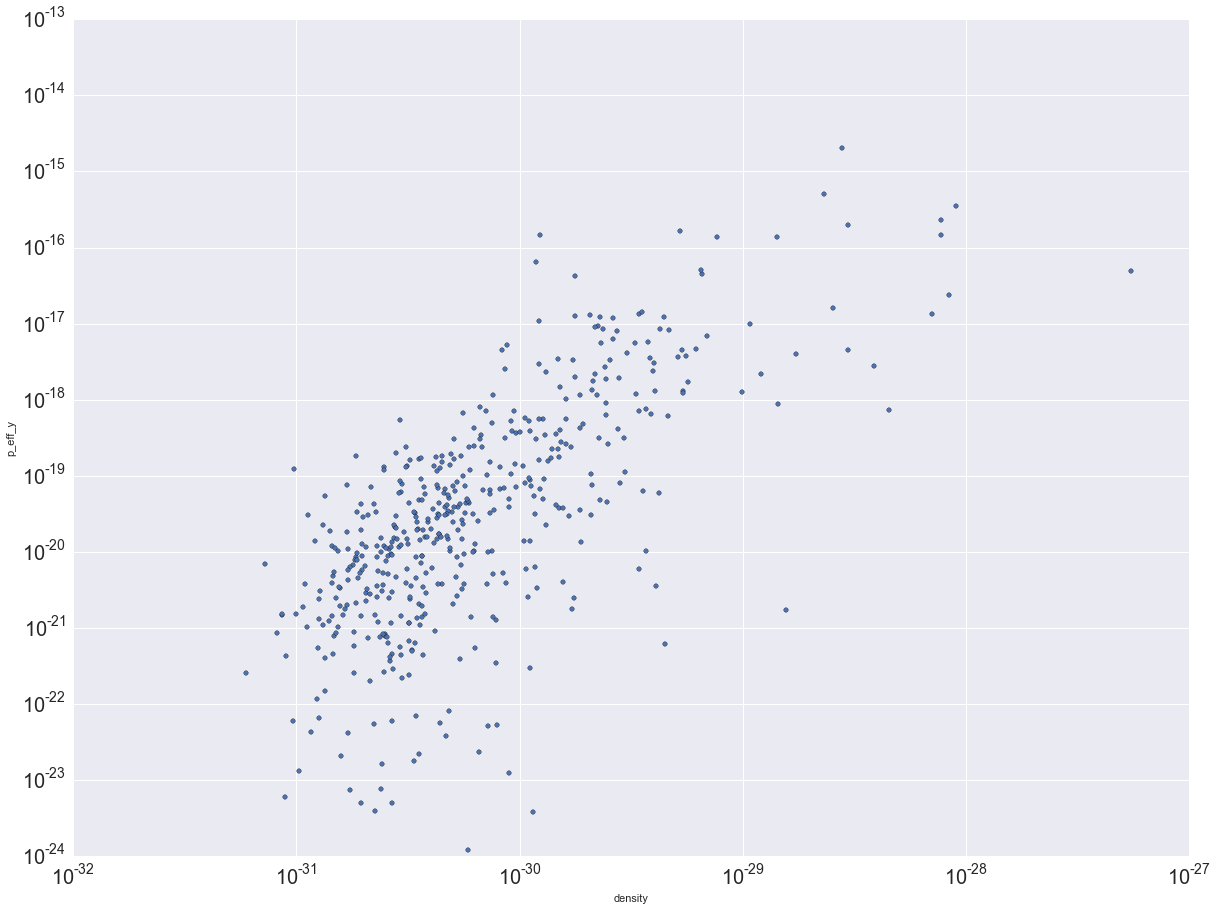

In [14]:
effective_pressure.plot.scatter(x='density', y='p_eff_y', loglog=True, ylim=[10e-25,10e-14], fontsize=20)

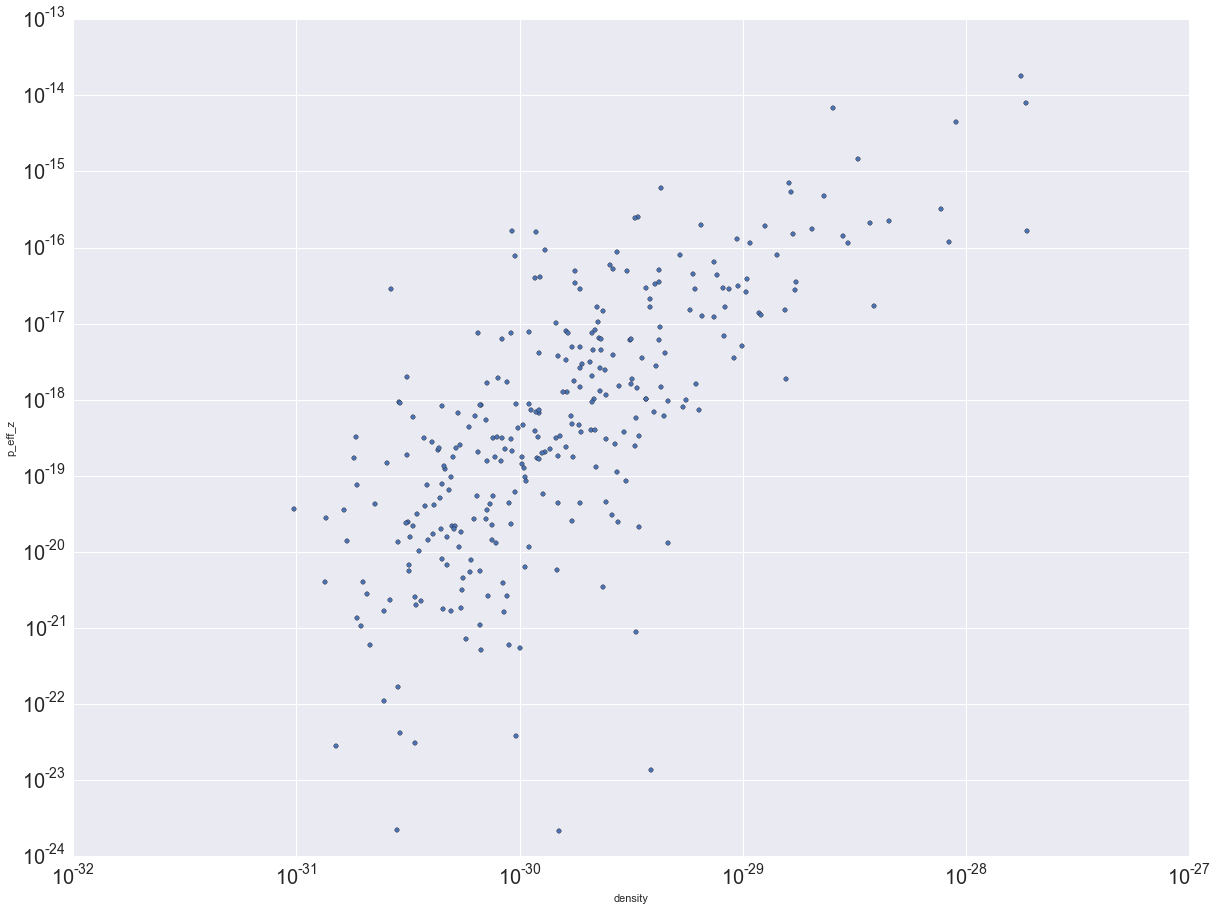

In [15]:
effective_pressure.plot.scatter(x='density', y='p_eff_z', loglog=True, ylim=[10e-25,10e-14], fontsize=20)

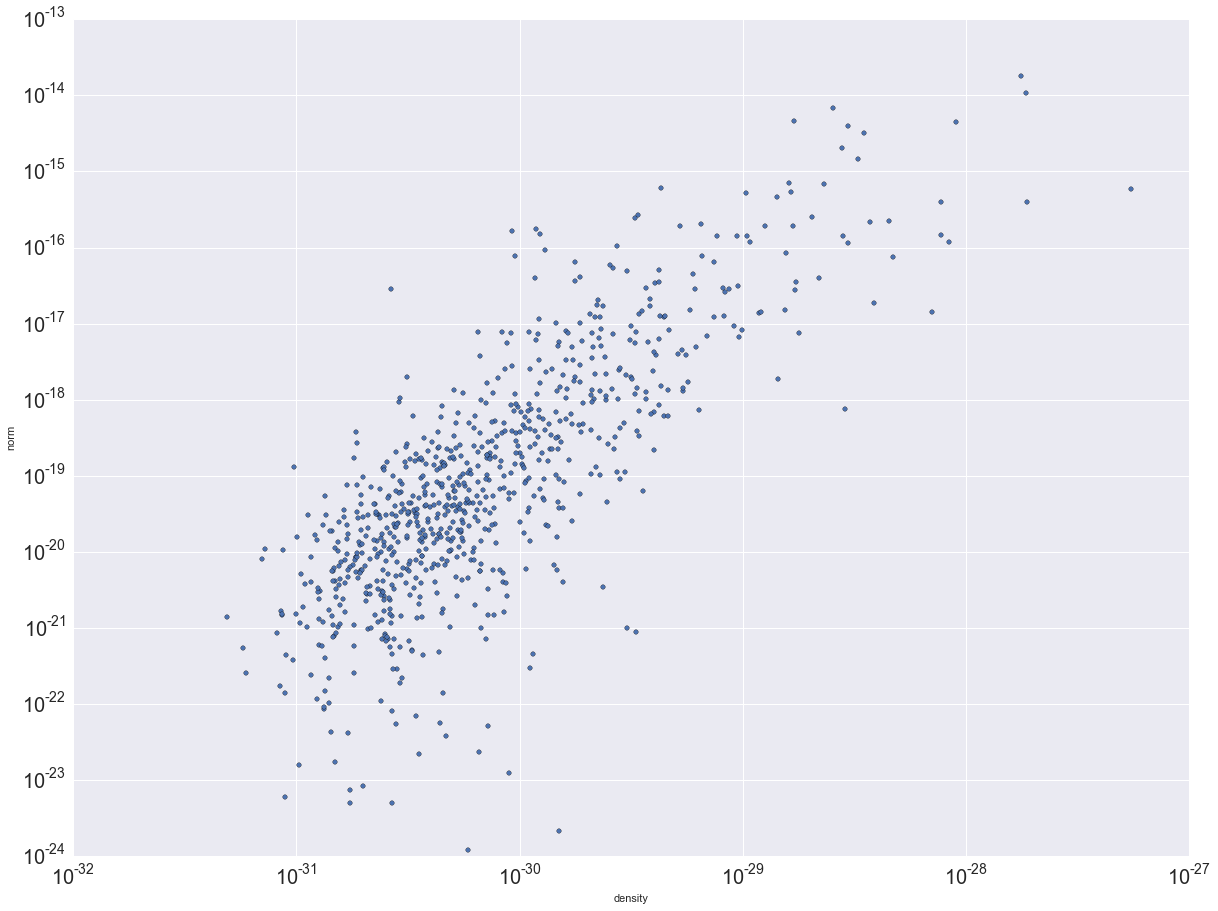

In [16]:
effective_pressure.plot.scatter(x='density', y='norm', loglog=True, ylim=[10e-25,10e-14], fontsize=20)